# Analyze the results from annotations
Show agreements and disagreements between the annotated polarities and the document- sentence- and target- level annotations

Note: This repositiry contains code that is being updated as the project is proceeding, and adjustments may have occured since the publishing of the ELSA paper

In [15]:
import json
import os
import time
from collections import Counter, defaultdict
import numpy as np
import random
import pandas as pd
import torch

save_root = "outputs/"
tabular_savefolder = os.path.join(save_root, "tabular")


In [20]:


excel_path = os.path.join(tabular_savefolder,"elsa_entities_annotated.xlsx" )
df = pd.read_excel(excel_path)
df = df.loc[df["manual_pol"]!="Spurious"]

doc_map = {1:"Negative", 2:"Negative", 3:"Neutral", 4:"Neutral", 5:"Positive", 6:"Positive"}
df["doc_pol"] = df["doc_rating"].map(doc_map)
doc_elsa = pd.pivot_table(df, index = ["manual_pol"], values = "entity_id", columns = "doc_pol", aggfunc='count')
# Document-level polarity vs entity polarity
hits = np.sum([doc_elsa.at[pol[:3], pol] for pol in ["Negative", "Neutral","Positive"]])
print("Document polarity vs entity polarity:",hits, len(df), round(hits/len(df), 3))

print(doc_elsa)
doc_elsa.T.plot.bar(stacked=True)
for c in doc_elsa.columns:
    doc_elsa[c+"_rel"] = doc_elsa[c]/doc_elsa[c].sum()
doc_elsa[[c for c in doc_elsa.columns if "_rel" in c]].T.plot.bar(stacked=True)


Document polarity vs entity polarity: 133 281 0.473
doc_pol     Negative  Neutral  Positive
manual_pol                             
Neg               15        8         5
Neu               29       66        75
Pos                3       26        52


<AxesSubplot:xlabel='doc_pol'>

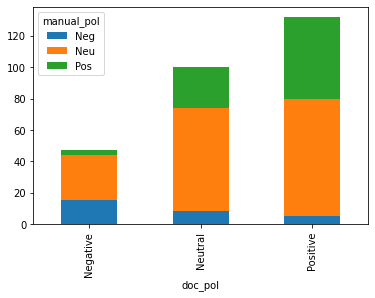

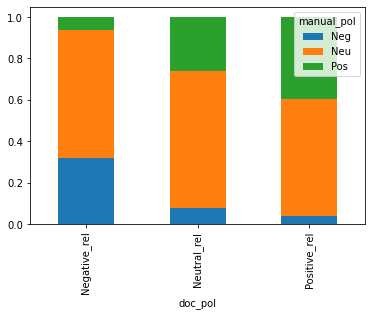

In [18]:
# Sentence polarity
df.head(20)
sent_vs_entity = []
for i, row in df.iterrows():
    entity_pol = row["manual_pol"]
    for sent_pol in row["sentences_pol"]:
        
    
list(df.columns)

IndentationError: expected an indented block (1688109955.py, line 9)